In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob  # finding image paths
import numpy as np  # creating numpy arrays
from skimage.io import imread  # reading images
from skimage.transform import resize  # resizing images
import cv2

# For reproducibility
np.random.seed(42)

import fnmatch
import os
import pickle as pkl

import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_hub as hub

from keras.utils import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Rescaling
from tensorflow.keras import utils
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay,f1_score, 
                             recall_score, precision_score, balanced_accuracy_score, RocCurveDisplay)

In [2]:
#Code adapted from : https://colab.research.google.com/notebooks/snippets/drive.ipynb#scrollTo=TbRbQAYqPTci

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [4]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Nov  9 17:04:15 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    43W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
def resize_images(dir_path, resized_dir_path):
  Xtrain_img_list1 = sorted(glob.glob(f'{dir_path}/*.jpeg'))

  IMG_height = 224
  IMG_width = 224
  Xtrain_img_data = np.empty((len(Xtrain_img_list1), IMG_height, IMG_width, 3), dtype=np.float32)
  Xtrain_img_name=[None] * len(Xtrain_img_list1)
  print(len(Xtrain_img_data))
  print(len(Xtrain_img_name))
  ## read and convert to arrays
  for i, img_path in enumerate(Xtrain_img_list1):
    try:
      # print(i)    
      img = cv2.imread(img_path)   
      img_resized = cv2.resize(img, (IMG_width,IMG_height), interpolation = cv2.INTER_CUBIC)
      # save to numpy array
    
      Xtrain_img_data[i] = img_resized 
    
      Xtrain_img_name[i]=str(img_path.rsplit('.',1)[0].rsplit('/',1)[1])
      
      cv2.imwrite(f'{resized_dir_path}/{Xtrain_img_name[i]}_resized.png', Xtrain_img_data[i]) 

      if i in [1,1000,2000,3000,4000,5000,6000,7000,8000,8408]:
        print(i)

    except Exception:
      print(f'some error for image: {Xtrain_img_name[i]}')   

  return (Xtrain_img_data, Xtrain_img_name) 


In [ ]:
dir_path='/content/drive/MyDrive/GA/Capstone/train_4/train'
resized_dir_path='/content/drive/MyDrive/GA/Capstone/train/train_2_reshapedImg'

In [ ]:
#do not run it again, resized images saved in the directory
#train resized images are in /content/drive/MyDrive/GA/Capstone/train/train_2_reshapedImg
Xtrain_img_data, Xtrain_img_name = resize_images(dir_path, resized_dir_path)

8415
8415
1
1000
2000
3000
4000
5000
6000
7000
8000
8408


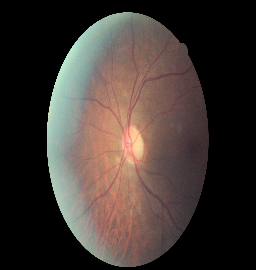

In [ ]:
cv2_imshow(img1)

In [ ]:
#dont run it again- the names list is saved in the directory

# read train labels csv
train_labels=pd.read_csv('/content/drive/MyDrive/GA/Capstone/trainLabels.csv')
train_labels.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [ ]:
#dont run it again- the names list is saved in the directory

def get_label(image, train_labels):
  return(train_labels[train_labels['image']==image]['level'].values[0])

In [ ]:
#dont run it again- the labels are saved in the directory

#help from https://github.com/keras-team/keras/issues/14416

# label_list =[None] * len(fnmatch.filter(os.listdir('/content/drive/MyDrive/GA/Capstone/train/train_2_reshapedImg'), '*.png'))
# image_names=[None] * len(fnmatch.filter(os.listdir('/content/drive/MyDrive/GA/Capstone/train/train_2_reshapedImg'), '*.png'))

# for proot, directories, images in os.walk('/content/drive/MyDrive/GA/Capstone/train'):
#   # print(images)
#   i=0
#   for image in images:
#     # label_file = replace_file_extension(image_file, 'png', 'csv')
#     image_names[i]=str(image.rsplit('.',1)[0].rsplit('_',1)[0])
#     label_list[i]=get_label(image_names[i], train_labels)
#     i+=1

In [ ]:
#dont run it again- the names list is saved in the directory

# label_df=pd.DataFrame(image_names,columns=['image_id'])
# label_df['label']=label_list
# label_df.head(10)

,image_id,label
0,37569_right,0
1,37571_left,0
2,37571_right,0
3,37573_left,0
4,37573_right,0
5,37575_left,0
6,37575_right,0
7,37579_left,0
8,37579_right,0
9,37580_left,0


In [ ]:
label_df.shape

(28860, 2)

In [ ]:
#dont run it again- the names list is saved in the directory

# label_df['level']=label_df['label'].map( {0:'No DR', 1:'Mild DR',2:'Moderate DR',3:'Severe DR',4:'Proliferative DR'})

In [ ]:
#dont run it again- the names list is saved in the directory

# label_df.head()

,image_id,label,level
0,37569_right,0,No DR
1,37571_left,0,No DR
2,37571_right,0,No DR
3,37573_left,0,No DR
4,37573_right,0,No DR


In [ ]:
#dont run it again- the names list is saved in the directory

# label_df.sort_values(by='image_id', inplace=True)
# # label_df = label_df.reindex(index=order_by_index(label_df.index, index_natsorted(label_df['image_id'])))
# label_df.head()

,image_id,label,level
13933,10003_left,0,No DR
13934,10003_right,0,No DR
13935,10007_left,0,No DR
13936,10007_right,0,No DR
13937,10009_left,0,No DR


In [ ]:
#dont run it again- the names list is saved in the directory

# train_labels (~20k images) saved in '/content/drive/MyDrive/GA/Capstone/train_2_reshapedImg_labels3_b.csv'
# test labels saved in '/content/drive/MyDrive/GA/Capstone/test_reshapedImg_labels_b.csv'

# label_df.to_csv('/content/drive/MyDrive/GA/Capstone/train_2_reshapedImg_labels3.csv', index=False)


In [ ]:
# train_label_df=pd.read_csv('/content/drive/MyDrive/GA/Capstone/train_2_reshapedImg_labels3.csv')
# print(train_label_df.shape)
# train_label_df.head(25)

(28860, 3)


,image_id,label,level
0,10003_left,0,No DR
1,10003_right,0,No DR
2,10007_left,0,No DR
3,10007_right,0,No DR
4,10009_left,0,No DR
5,10009_right,0,No DR
6,1000_left,0,No DR
7,1000_right,0,No DR
8,10010_left,0,No DR
9,10010_right,0,No DR


**Highly imbalanced classes**

In [ ]:
train_label_df['label'].value_counts(normalize=True)

0    0.737318
2    0.149931
1    0.068468
3    0.024705
4    0.019577
Name: label, dtype: float64

In [ ]:
train_label_df['label'].value_counts()

0    21279
2     4327
1     1976
3      713
4      565
Name: label, dtype: int64

Creating a column for binary classification (labels are 1 for class: 1,2,3,4

In [ ]:
# train_label_df['label_b']=train_label_df['label'].map({0:0, 1:1,2:1,3:1,4:1})
# train_label_df.head(25)

,image_id,label,level,label_b
0,10003_left,0,No DR,0
1,10003_right,0,No DR,0
2,10007_left,0,No DR,0
3,10007_right,0,No DR,0
4,10009_left,0,No DR,0
5,10009_right,0,No DR,0
6,1000_left,0,No DR,0
7,1000_right,0,No DR,0
8,10010_left,0,No DR,0
9,10010_right,0,No DR,0


In [ ]:
train_label_df['label_b'].value_counts(normalize=True)

0    0.737318
1    0.262682
Name: label_b, dtype: float64

In [ ]:
train_label_df['label_b'].value_counts()

0    21279
1     7581
Name: label_b, dtype: int64

The classes are still imbalanced but models may perform better with binary classification

In [ ]:
# train_label_df.to_csv('/content/drive/MyDrive/GA/Capstone/train_2_reshapedImg_labels3_b.csv', index=False)

In [ ]:
# test_label_df=pd.read_csv('/content/drive/MyDrive/GA/Capstone/test_reshapedImg_labels.csv')
# print(test_label_df.shape)
# test_label_df.head(25)

(3822, 3)


,image_id,label,level
0,29127_left,0,No DR
1,29127_right,0,No DR
2,29132_left,0,No DR
3,29132_right,0,No DR
4,29135_left,0,No DR
5,29135_right,0,No DR
6,29137_left,0,No DR
7,29137_right,0,No DR
8,29139_left,0,No DR
9,29139_right,0,No DR


In [ ]:
test_label_df['label'].value_counts(normalize=True)

0    0.725798
2    0.150968
1    0.072737
3    0.028781
4    0.021716
Name: label, dtype: float64

In [ ]:
# test_label_df['label_b']=test_label_df['label'].map({0:0, 1:1,2:1,3:1,4:1})
# test_label_df.head(25)

,image_id,label,level,label_b
0,29127_left,0,No DR,0
1,29127_right,0,No DR,0
2,29132_left,0,No DR,0
3,29132_right,0,No DR,0
4,29135_left,0,No DR,0
5,29135_right,0,No DR,0
6,29137_left,0,No DR,0
7,29137_right,0,No DR,0
8,29139_left,0,No DR,0
9,29139_right,0,No DR,0


In [ ]:
# test_label_df.to_csv('/content/drive/MyDrive/GA/Capstone/test_reshapedImg_labels_b.csv', index=False)
# # 

In [5]:
train_label_df=pd.read_csv('/content/drive/MyDrive/GA/Capstone/train_2_reshapedImg_labels3_b.csv')
train_label_df.head()

,image_id,label,level,label_b
0,10003_left,0,No DR,0
1,10003_right,0,No DR,0
2,10007_left,0,No DR,0
3,10007_right,0,No DR,0
4,10009_left,0,No DR,0


In [6]:
test_label_df=pd.read_csv('/content/drive/MyDrive/GA/Capstone/test_reshapedImg_labels_b.csv')
test_label_df.head()

,image_id,label,level,label_b
0,29127_left,0,No DR,0
1,29127_right,0,No DR,0
2,29132_left,0,No DR,0
3,29132_right,0,No DR,0
4,29135_left,0,No DR,0


In [7]:
train_label_df['label'].value_counts()

0    21279
2     4327
1     1976
3      713
4      565
Name: label, dtype: int64

## Data Augementation
Getting image ids for different classes

In [30]:
train_0=train_label_df[train_label_df['label']==0].copy()
train_0['image_id']=train_0['image_id'].map(lambda x: x+'_resized')
train_0=train_0[:4000]
train_0

,image_id,label,level,label_b
0,10003_left_resized,0,No DR,0
1,10003_right_resized,0,No DR,0
2,10007_left_resized,0,No DR,0
3,10007_right_resized,0,No DR,0
4,10009_left_resized,0,No DR,0
...,...,...,...,...
5477,1624_right_resized,0,No DR,0
5478,16257_left_resized,0,No DR,0
5479,16257_right_resized,0,No DR,0
5480,16258_left_resized,0,No DR,0


In [35]:
train_1=train_label_df[train_label_df['label']==1].copy()
train_1['image_id']=train_1['image_id'].map(lambda x: x+'_resized')
train_1

,image_id,label,level,label_b
26,10030_left_resized,1,Mild DR,1
27,10030_right_resized,1,Mild DR,1
64,10085_left_resized,1,Mild DR,1
65,10085_right_resized,1,Mild DR,1
123,10150_right_resized,1,Mild DR,1
...,...,...,...,...
28842,8407_right_resized,1,Mild DR,1
28845,8410_left_resized,1,Mild DR,1
28846,8410_right_resized,1,Mild DR,1
28854,8418_right_resized,1,Mild DR,1


In [37]:
train_2=train_label_df[train_label_df['label']==2].copy()
train_2['image_id']=train_2['image_id'].map(lambda x: x+'_resized')
train_2

,image_id,label,level,label_b
25,1002_right_resized,2,Moderate DR,1
36,10043_left_resized,2,Moderate DR,1
37,10043_right_resized,2,Moderate DR,1
82,10109_left_resized,2,Moderate DR,1
83,10109_right_resized,2,Moderate DR,1
...,...,...,...,...
28811,8368_left_resized,2,Moderate DR,1
28812,8368_right_resized,2,Moderate DR,1
28821,8387_left_resized,2,Moderate DR,1
28822,8387_right_resized,2,Moderate DR,1


In [39]:
train_3=train_label_df[train_label_df['label']==3].copy()
train_3['image_id']=train_3['image_id'].map(lambda x: x+'_resized')
train_3

,image_id,label,level,label_b
24,1002_left_resized,3,Severe DR,1
40,10047_left_resized,3,Severe DR,1
66,1008_left_resized,3,Severe DR,1
67,1008_right_resized,3,Severe DR,1
96,10125_left_resized,3,Severe DR,1
...,...,...,...,...
28717,8248_left_resized,3,Severe DR,1
28745,8284_left_resized,3,Severe DR,1
28761,8302_left_resized,3,Severe DR,1
28762,8302_right_resized,3,Severe DR,1


In [40]:
train_4=train_label_df[train_label_df['label']==4].copy()
train_4['image_id']=train_4['image_id'].map(lambda x: x+'_resized')
train_4

,image_id,label,level,label_b
16,10017_left_resized,4,Proliferative DR,1
17,10017_right_resized,4,Proliferative DR,1
41,10047_right_resized,4,Proliferative DR,1
169,10193_right_resized,4,Proliferative DR,1
280,10312_left_resized,4,Proliferative DR,1
...,...,...,...,...
28701,8236_left_resized,4,Proliferative DR,1
28702,8236_right_resized,4,Proliferative DR,1
28749,8292_left_resized,4,Proliferative DR,1
28750,8292_right_resized,4,Proliferative DR,1


In [24]:
import shutil


In [43]:
train_0['image_id'].to_list();

In [44]:
source_dir='/content/drive/MyDrive/GA/Capstone/train/train_2_reshapedImg'
target_dir='/content/drive/MyDrive/GA/Capstone/train_augmentation/0'

for file in train_0['image_id'].to_list():
  shutil.copy2(f'{source_dir}/{file}.png', target_dir)

In [45]:
source_dir='/content/drive/MyDrive/GA/Capstone/train/train_2_reshapedImg'
target_dir='/content/drive/MyDrive/GA/Capstone/train_augmentation/1'

for file in train_1['image_id'].to_list():
  shutil.copy2(f'{source_dir}/{file}.png', target_dir)

In [46]:
source_dir='/content/drive/MyDrive/GA/Capstone/train/train_2_reshapedImg'
target_dir='/content/drive/MyDrive/GA/Capstone/train_augmentation/3'

for file in train_3['image_id'].to_list():
  shutil.copy2(f'{source_dir}/{file}.png', target_dir)

In [47]:
source_dir='/content/drive/MyDrive/GA/Capstone/train/train_2_reshapedImg'
target_dir='/content/drive/MyDrive/GA/Capstone/train_augmentation/4'

for file in train_4['image_id'].to_list():
  shutil.copy2(f'{source_dir}/{file}.png', target_dir)

In [48]:
source_dir='/content/drive/MyDrive/GA/Capstone/train/train_2_reshapedImg'
target_dir='/content/drive/MyDrive/GA/Capstone/train_augmentation/2'

for file in train_2['image_id'].to_list():
  shutil.copy2(f'{source_dir}/{file}.png', target_dir)